# Numerical Exercises 11: Tridimensional Fit

In [3]:
from XYTrigModel import XYTrigModel
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

N_Epoch = 10
N_Train = 5000              # 1000 lead to overfitting
N_Valid = 500
Sigma = 0.1                 # Do not have too sparse data

model_path = "./Models/"
hist_path = "./Histories/"

In this last exercise I will try further tweaking the network of Exercise 11.2 to fit this tridimensional trigonometric function: $$f(x,y) = \sin(x^2+y^2)$$ 
Within the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Firstly, I adapted the neural network code of the last notebook to allow for a two dimensional input as required and then I trained the exact same network from the previous exercise on the new input data. The results were already very good and so, rather than completely changing the network architecture, I simply increased the number of train and validation points (as we saw in Exercise 11.1 often enlarging the training set is sufficient to greatly improve the final predictions). At the end I used $N_{Train}=5000$, $N_{Valid}=500$ and I let the network train for $100$ epochs.

Loading pre-trained model...


/tmp/ipykernel_30897/644512144.py:66: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


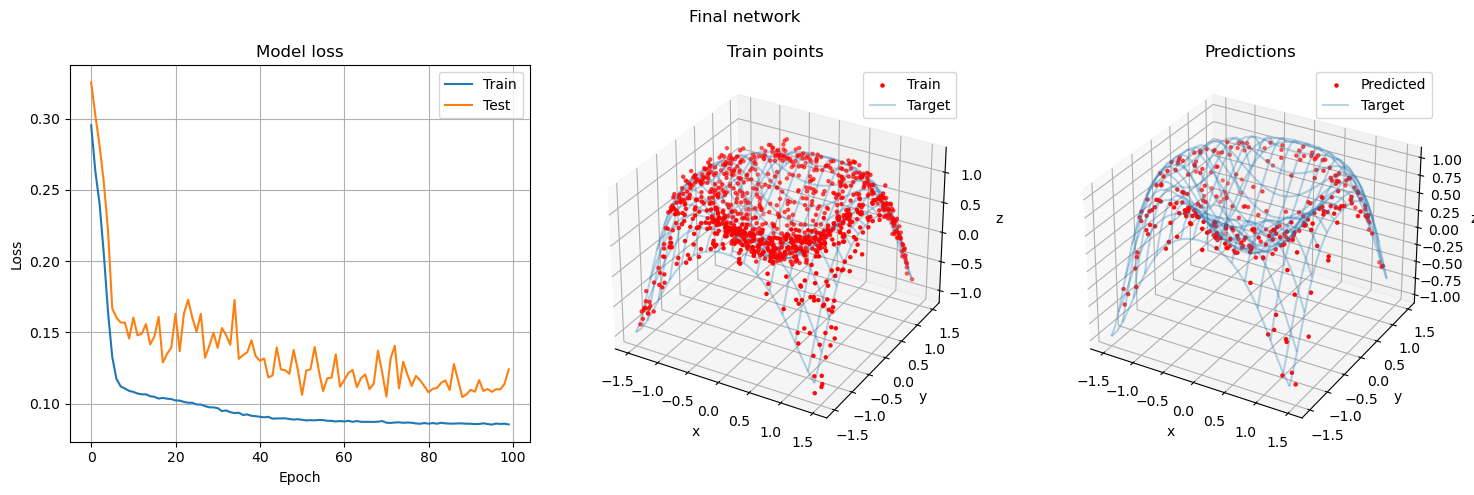

In [9]:
N_Layer = 4
Shape = [50, 20, 20, 10]        
N_Epochs_Final = 100

figure = plt.figure()
figure.set_size_inches(15, 5)

model_filename = model_path + "TM_final.keras"
hist_filename = hist_path + "hist_final.npy"

TM = XYTrigModel(N_Epochs_Final, N_Train, N_Valid, Sigma, N_Layer, Shape, 'rmsprop', 'mae', 'leaky_relu', False)

if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename))):

    TM.TrainModel()
    TM.SaveModel(model_filename, hist_filename)

else:

    TM.LoadModel(model_filename, hist_filename)

loss_ax = figure.add_subplot(1, 3, 1)
train_ax = figure.add_subplot(1, 3, 2, projection = '3d')
predict_ax = figure.add_subplot(1, 3, 3, projection = '3d')

# look into training history
# Plot training & validation loss values
loss_ax.plot(TM.history.history['loss'])
loss_ax.plot(TM.history.history['val_loss'])
loss_ax.set_title('Model loss')
loss_ax.set_ylabel('Loss')
loss_ax.set_xlabel('Epoch')
loss_ax.legend(['Train', 'Test'], loc='best')
loss_ax.grid(True)

x_surf = np.arange(-3/2,3/2, 0.1)
y_surf = np.arange(-3/2,3/2, 0.1)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)

train_ax.scatter(TM.train_data[:1000, 0], TM.train_data[:1000, 1], TM.z_train[:1000], color='r', marker = '.', label = "Train")      # Plot the first 1000 train points
train_ax.plot_wireframe( X_surf, Y_surf, TM.F(X_surf,Y_surf), rstride = 2, cstride = 2, alpha = 0.3, label = "Target")
train_ax.set_xlabel("x")
train_ax.set_ylabel("y")
train_ax.set_zlabel("z")
train_ax.set_title("Train points")
train_ax.legend()
train_ax.grid(True)

x_predicted = np.random.uniform(-3/2, 3/2, 300)
y_predicted = np.random.uniform(-3/2, 3/2, 300)
data_predicted = np.asarray([x_predicted, y_predicted]).transpose()

z_predicted = TM.model.predict(data_predicted, verbose = TM.verbose)
predict_ax.scatter(x_predicted, y_predicted, z_predicted, color='r', marker = '.', label = "Predicted")     # Use a smaller marker not to overcrowd graph
predict_ax.plot_wireframe( X_surf, Y_surf, TM.F(X_surf,Y_surf), rstride = 2, cstride = 2, alpha = 0.3, label = "Target")
predict_ax.set_xlabel("x")
predict_ax.set_ylabel("y")
predict_ax.set_zlabel("z")
predict_ax.set_title("Predictions")
predict_ax.legend()
predict_ax.grid(True)


figure.suptitle("Final network")
figure.tight_layout()
figure.show()

As we can see the final predictions looks very close to the target function, even at the edge of the training domain. The only visible worsening from the previous exercise can be found in the test loss, which remain higher even after many epochs; this latter fact is not completely unexpected, since we are trying to a fit a more complex function and we also have an higher number of validation data (and thus more possibility to have bad predictions).